# Machine Learning - Asignment 6

This week we look at a new algorithm called Support Vector Machine (SVM). We will use it mainly as a comparison against classification models such as logistic regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.optimize as op
from scipy.io import loadmat
from sklearn.svm import LinearSVC, SVC

## Problem 1: SVM

### Problem 1.1: Linear SVM

First we load the data

In [60]:
data = loadmat('./data/ex6data1.mat')
X, y = data["X"], data["y"].ravel()
print(X.shape, y.shape)

(51, 2) (51,)


Then, we can plot it

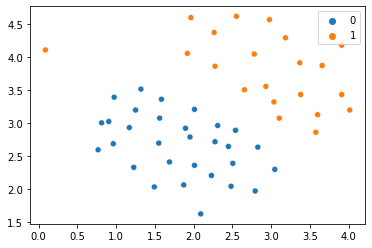

In [61]:
plt.figure()
sns.scatterplot(x=X[:,0],y=X[:,1], hue =y)
plt.show()

Now we define fucion plotdecisionboundary to plot the classification line with sklearn Linear SVC method

In [62]:
def plotDecisionBoundary(clf, X, y):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    y_plot = clf.decision_function(X_plot).reshape(xx.shape)
    
    plt.figure()
#     plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red")
#     plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue")
    sns.scatterplot(x=X[:,0],y=X[:,1], hue =y)
    plt.contour(xx, yy, y_plot, levels=[0])
    plt.show()

We try C = 1 first and then C = 100 to compare results

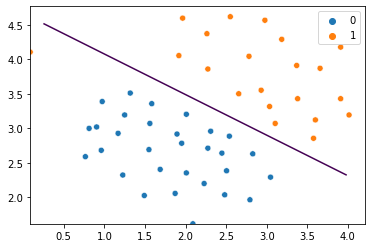

In [63]:
clf = LinearSVC(C=1)
clf.fit(X, y)
plotDecisionBoundary(clf, X, y)

/Users/rodolfocastro/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


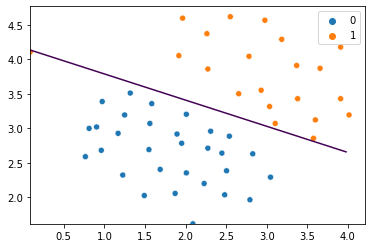

In [64]:
clf = LinearSVC(C=100)
clf.fit(X, y)
plotDecisionBoundary(clf, X, y)

### Problem 1.2: SVM with gaussian kernels

### Dataset 2

Now we will use non linear SVM with guassian kernel on a differnt data set to predict different classes

In [66]:
data = loadmat('./data/ex6data2.mat')
X, y = data["X"], data["y"].ravel()
print(X.shape, y.shape)

(863, 2) (863,)


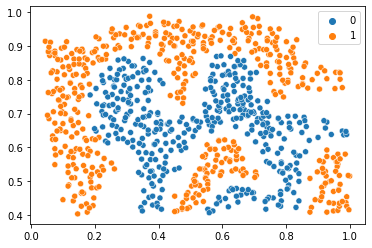

In [68]:
plt.figure()
sns.scatterplot(x=X[:,0],y=X[:,1], hue =y)
plt.show()

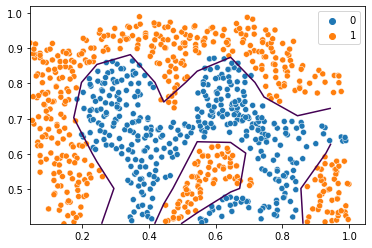

In [70]:
clf = SVC(C = 30, gamma = 30)
clf.fit(X, y)
plotDecisionBoundary(clf, X, y)

### Dataset 3

In [71]:
data = loadmat('./data/ex6data3.mat')
X, y = data["X"], data["y"].ravel()
Xval, yval = data["Xval"], data["yval"].ravel()
print(X.shape, y.shape)
print(Xval.shape, yval.shape)

(211, 2) (211,)
(200, 2) (200,)


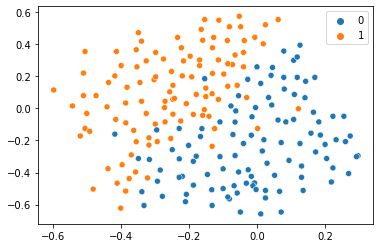

In [72]:
plt.figure()
sns.scatterplot(x=X[:,0],y=X[:,1], hue =y)
plt.show()

Now, lets build a function that try outs every C value with sigma value and gets the best pair with the best CV error

In [73]:
def dataset3Params(X, y, Xval, yval):
    C_test = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    gamma_test = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    best_score = -np.inf
    for C in C_test:
        for gamma in gamma_test:
            clf = SVC(C = C, gamma = gamma)
            clf.fit(X, y)
            score = clf.score(Xval, yval)
            if score > best_score:
                C_opt = C
                gamma_opt = gamma
                best_score = score
    return C_opt, gamma_opt, best_score

In [74]:
C, gamma, score = dataset3Params(X, y, Xval, yval)
print('C =',C,'gamma =',gamma,'error_val = ',score)

C = 3 gamma = 30 error_val =  0.965


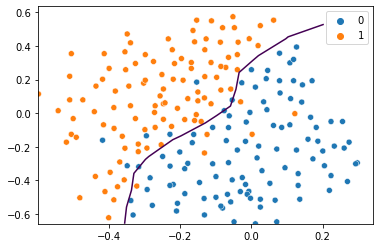

In [75]:
clf = SVC(C = C, gamma = gamma)
clf.fit(X, y)
plotDecisionBoundary(clf, X, y)

## Problem 2: Spam Classification

In this last problem of SVM, we are going to train a SVM model for spam classification (y=1 is spam)

In [81]:
data1 = loadmat("./data/spamTrain.mat")
X_train, y_train = data1["X"], data1["y"].ravel()
print(X_train.shape, y_train.shape)

(4000, 1899) (4000,)


In [83]:
data2 = loadmat("./data/spamTest.mat")
X_test, y_test = data2["Xtest"], data2["ytest"].ravel()
print(X_test.shape, y_test.shape)

(1000, 1899) (1000,)


### Problem 2.1: Preprocessing emails

Sadly, I'm not in a level to understand how "tokenizing" text works in Python. In future work whenever I figure this out, I will come back and do this question.

In [117]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.99975
0.98
